# Model Training

### 1.1 importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [56]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [57]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [42]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_score'] = df['Total_score'] /3 

In [58]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

## Feature Engineering
- Making total score and average score feature
- Dropping 3 subject

In [26]:
df = df.drop(['math score', 'reading score', 'writing score'], axis = 1)

In [27]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  Total_score  Average_score  
0                    none          218      72.666667  
1               completed          247      82.333333  
2                    none          278      92.666667  
3                    none          148      49.333333  
4                    none          229      76.333333

## Preparing X(independent) and y(dependent) variables

In [59]:
X = df.drop(['math score'], axis = 1)
y = df['math score']

In [60]:
X.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  reading score  writing score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [61]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [62]:
print("Categories in Gender variable:",end="" )
print(df['gender'].unique())

print("Categories in Race variable:",end="")
print(df['race/ethnicity'].unique())

print("Categories in Parental level of education variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in Lunch variable:",end="" )
print(df['lunch'].unique())

print("Categories in Test preparation course variable:",end="" )
print(df['test preparation course'].unique())

Categories in Gender variable:['female' 'male']
Categories in Race variable:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch variable:['standard' 'free/reduced']
Categories in Test preparation course variable:['none' 'completed']


## Columns Transformation for the Model

In [63]:
numerical_features = X.select_dtypes(exclude = "object").columns
categorical_features = X.select_dtypes(include = "object" ).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, categorical_features),
        ("StandardScaler", numerical_transformer, numerical_features)
    ]
)

## Insight 
- A pipeline has been created to transform all the numerical and categorical columns 

In [64]:
X = preprocessor.fit_transform(X)

In [65]:
X.shape

(1000, 19)

## TrainTest Split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an evaluate function to give all the metrics after model training

In [67]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [68]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, mdl in models.items():
    #model training
    mdl.fit(X_train, y_train)

    #prediction
    y_train_pred = mdl.predict(X_train)
    y_test_pred = mdl.predict(X_test)

    #Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test, y_test_pred)

    model_list.append(name)
    r2_list.append(model_test_r2_score)

    print(f"\n===== {name} =====")

    print("Model performance for Training set")
    print("- Root Mean Squared Error(rmse) : {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error(mae) : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2_score))

    print("-------------------------------")

    print("Model performance for Test set")
    print("- Root Mean Squared Error(rmse) : {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error(mae) : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2_score))

    print('='*35)
    print('\n')
    
    


===== Linear Regression =====
Model performance for Training set
- Root Mean Squared Error(rmse) : 5.3240
- Mean Absolute Error(mae) : 4.2691
- R2 Score : 0.8743
-------------------------------
Model performance for Test set
- Root Mean Squared Error(rmse) : 5.3773
- Mean Absolute Error(mae) : 4.2053
- R2 Score : 0.8812



===== Lasso =====
Model performance for Training set
- Root Mean Squared Error(rmse) : 6.5938
- Mean Absolute Error(mae) : 5.2063
- R2 Score : 0.8071
-------------------------------
Model performance for Test set
- Root Mean Squared Error(rmse) : 6.5197
- Mean Absolute Error(mae) : 5.1579
- R2 Score : 0.8253



===== Ridge =====
Model performance for Training set
- Root Mean Squared Error(rmse) : 5.3233
- Mean Absolute Error(mae) : 4.2650
- R2 Score : 0.8743
-------------------------------
Model performance for Test set
- Root Mean Squared Error(rmse) : 5.3904
- Mean Absolute Error(mae) : 4.2111
- R2 Score : 0.8806



===== K-Neighbors Regressor =====
Model performa

## Results

In [69]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
0      Linear Regression  0.881171
2                  Ridge  0.880593
8     AdaBoost Regressor  0.852788
7  CatBoosting Regressor  0.851632
5          Random Forest  0.850556
6           XGBRegressor  0.827797
1                  Lasso  0.825320
3  K-Neighbors Regressor  0.784518
4          Decision Tree  0.734547

## Linear Regression

In [70]:
lin_model = LinearRegression(fit_intercept = True)
line_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.12


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

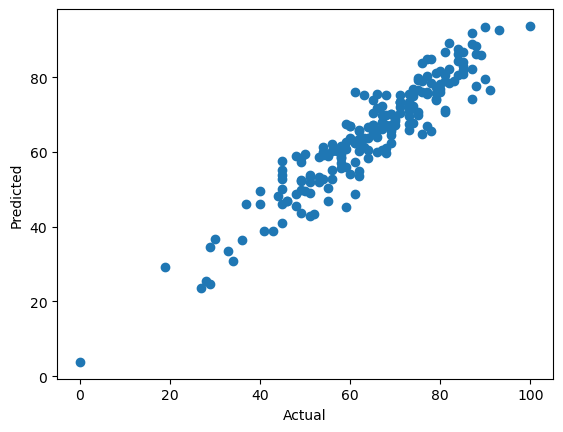

In [71]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

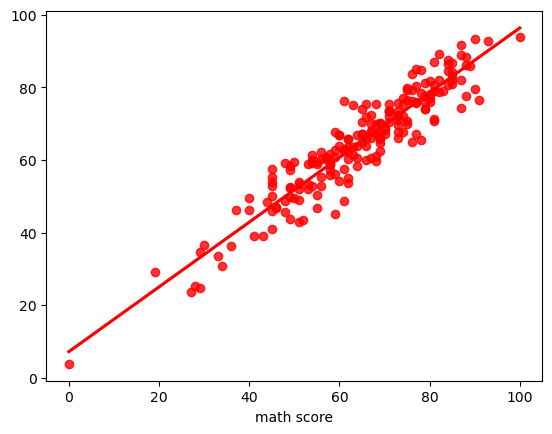

In [72]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'red')

## Difference between Actual and Predicted Values

In [73]:
predict_df = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_pred, 'Difference' : y_test - y_pred})
predict_df

Actual Value  Predicted Value  Difference
521            91        76.507812   14.492188
737            53        58.796875   -5.796875
740            80        76.976562    3.023438
660            74        76.984375   -2.984375
411            84        87.664062   -3.664062
..            ...              ...         ...
408            52        43.367188    8.632812
332            62        62.156250   -0.156250
208            74        67.812500    6.187500
613            65        67.125000   -2.125000
78             61        62.343750   -1.343750

[200 rows x 3 columns]